In [8]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from exnn import ExNN

def data_generator1(datanum, testnum=10000, noise_sigma=1, rand_seed=0):
    
    corr = 0.5
    np.random.seed(rand_seed)
    proj_matrix = np.zeros((10, 4))
    proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
    proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
    proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
    proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])
    u = np.random.uniform(-1, 1, [datanum + testnum, 1])
    t = np.sqrt(corr / (1 - corr))
    x = np.zeros((datanum + testnum, 10))
    for i in range(10):
        x[:, i:i + 1] = (np.random.uniform(-1, 1, [datanum + testnum, 1]) + t * u) / (1 + t)

    y = np.reshape(2 * np.dot(x, proj_matrix[:, 0]) + 0.2 * np.exp(-4 * np.dot(x, proj_matrix[:, 1])) + \
                   3 * (np.dot(x, proj_matrix[:, 2]))**2 + 2.5 * np.sin(np.pi * np.dot(x, proj_matrix[:, 3])), [-1, 1]) + \
              noise_sigma * np.random.normal(0, 1, [datanum + testnum, 1])
    
    task_type = "Regression"
    meta_info = {"X1":{"type":"continuous"},
             "X2":{"type":"continuous"},
             "X3":{"type":"continuous"},
             "X4":{"type":"continuous"},
             "X5":{"type":"continuous"},
             "X6":{"type":"continuous"},
             "X7":{"type":"continuous"},
             "X8":{"type":"continuous"},
             "X9":{"type":"continuous"},
             "X10":{"type":"continuous"},
             "Y":{"type":"target"}}
    for i, (key, item) in enumerate(meta_info.items()):
        if item['type'] == "target":
            sy = MinMaxScaler((-1, 1))
            y = sy.fit_transform(y)
            meta_info[key]["scaler"] = sy
        elif item['type'] == "categorical":
            enc = OrdinalEncoder()
            enc.fit(x[:,[i]])
            ordinal_feature = enc.transform(x[:,[i]])
            x[:,[i]] = ordinal_feature
            meta_info[key]["values"] = enc.categories_[0].tolist()
        else:
            sx = MinMaxScaler((-1, 1))
            x[:,[i]] = sx.fit_transform(x[:,[i]])
            meta_info[key]["scaler"] = sx

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=testnum, random_state=rand_seed)
    return train_x, test_x, train_y, test_y, task_type, meta_info

train_x, test_x, train_y, test_y, task_type, meta_info = data_generator1(datanum=10000, testnum=10000, noise_sigma=1, rand_seed=0)
model = ExNN(meta_info=meta_info,
               subnet_num=10,
               subnet_arch=[10, 6],
               task_type=task_type,
               activation_func=tf.tanh,
               batch_size=min(1000, int(train_x.shape[0] * 0.2)),
               training_epochs=2000,
               lr_bp=0.001,
               lr_cl=0.1,
               beta_threshold=0.05,
               tuning_epochs=100,
               l1_proj=0.001,
               l1_subnet=0.01,
               l2_smooth=10**(-6),
               verbose=True,
               val_ratio=0.2,
               early_stop_thres=500)

model.fit(train_x, train_y)

Initial training.
Training epoch: 1, train loss: 0.15243, val loss: 0.15319
Training epoch: 2, train loss: 0.13356, val loss: 0.13547
Training epoch: 3, train loss: 0.11574, val loss: 0.11758
Training epoch: 4, train loss: 0.09915, val loss: 0.10049
Training epoch: 5, train loss: 0.08545, val loss: 0.08645
Training epoch: 6, train loss: 0.07816, val loss: 0.07833
Training epoch: 7, train loss: 0.06871, val loss: 0.06867
Training epoch: 8, train loss: 0.06548, val loss: 0.06517
Training epoch: 9, train loss: 0.05748, val loss: 0.05773
Training epoch: 10, train loss: 0.05786, val loss: 0.05819
Training epoch: 11, train loss: 0.04962, val loss: 0.05019
Training epoch: 12, train loss: 0.04886, val loss: 0.04934
Training epoch: 13, train loss: 0.04819, val loss: 0.04860
Training epoch: 14, train loss: 0.04446, val loss: 0.04476
Training epoch: 15, train loss: 0.04247, val loss: 0.04275
Training epoch: 16, train loss: 0.03910, val loss: 0.03954
Training epoch: 17, train loss: 0.03977, val lo

Training epoch: 142, train loss: 0.01934, val loss: 0.01989
Training epoch: 143, train loss: 0.01948, val loss: 0.02001
Training epoch: 144, train loss: 0.01949, val loss: 0.01998
Training epoch: 145, train loss: 0.01964, val loss: 0.02017
Training epoch: 146, train loss: 0.01926, val loss: 0.01982
Training epoch: 147, train loss: 0.01926, val loss: 0.01988
Training epoch: 148, train loss: 0.01964, val loss: 0.02034
Training epoch: 149, train loss: 0.01906, val loss: 0.01960
Training epoch: 150, train loss: 0.01949, val loss: 0.02020
Training epoch: 151, train loss: 0.01913, val loss: 0.01975
Training epoch: 152, train loss: 0.01931, val loss: 0.01982
Training epoch: 153, train loss: 0.01968, val loss: 0.02048
Training epoch: 154, train loss: 0.01911, val loss: 0.01988
Training epoch: 155, train loss: 0.01887, val loss: 0.01951
Training epoch: 156, train loss: 0.01923, val loss: 0.01992
Training epoch: 157, train loss: 0.01891, val loss: 0.01953
Training epoch: 158, train loss: 0.01980

Training epoch: 280, train loss: 0.01716, val loss: 0.01797
Training epoch: 281, train loss: 0.01715, val loss: 0.01793
Training epoch: 282, train loss: 0.01720, val loss: 0.01790
Training epoch: 283, train loss: 0.01728, val loss: 0.01801
Training epoch: 284, train loss: 0.01748, val loss: 0.01822
Training epoch: 285, train loss: 0.01726, val loss: 0.01797
Training epoch: 286, train loss: 0.01707, val loss: 0.01782
Training epoch: 287, train loss: 0.01828, val loss: 0.01905
Training epoch: 288, train loss: 0.01722, val loss: 0.01798
Training epoch: 289, train loss: 0.01704, val loss: 0.01774
Training epoch: 290, train loss: 0.01722, val loss: 0.01802
Training epoch: 291, train loss: 0.01735, val loss: 0.01811
Training epoch: 292, train loss: 0.01729, val loss: 0.01804
Training epoch: 293, train loss: 0.01695, val loss: 0.01765
Training epoch: 294, train loss: 0.01729, val loss: 0.01800
Training epoch: 295, train loss: 0.01817, val loss: 0.01905
Training epoch: 296, train loss: 0.01707

Training epoch: 418, train loss: 0.01605, val loss: 0.01656
Training epoch: 419, train loss: 0.01608, val loss: 0.01664
Training epoch: 420, train loss: 0.01744, val loss: 0.01787
Training epoch: 421, train loss: 0.01584, val loss: 0.01636
Training epoch: 422, train loss: 0.01644, val loss: 0.01705
Training epoch: 423, train loss: 0.01633, val loss: 0.01691
Training epoch: 424, train loss: 0.01642, val loss: 0.01688
Training epoch: 425, train loss: 0.01614, val loss: 0.01664
Training epoch: 426, train loss: 0.01622, val loss: 0.01684
Training epoch: 427, train loss: 0.01618, val loss: 0.01668
Training epoch: 428, train loss: 0.01653, val loss: 0.01705
Training epoch: 429, train loss: 0.01636, val loss: 0.01697
Training epoch: 430, train loss: 0.01668, val loss: 0.01730
Training epoch: 431, train loss: 0.01603, val loss: 0.01648
Training epoch: 432, train loss: 0.01594, val loss: 0.01649
Training epoch: 433, train loss: 0.01581, val loss: 0.01631
Training epoch: 434, train loss: 0.01597

Training epoch: 556, train loss: 0.01610, val loss: 0.01653
Training epoch: 557, train loss: 0.01628, val loss: 0.01680
Training epoch: 558, train loss: 0.01613, val loss: 0.01652
Training epoch: 559, train loss: 0.01593, val loss: 0.01635
Training epoch: 560, train loss: 0.01647, val loss: 0.01699
Training epoch: 561, train loss: 0.01634, val loss: 0.01688
Training epoch: 562, train loss: 0.01634, val loss: 0.01673
Training epoch: 563, train loss: 0.01599, val loss: 0.01648
Training epoch: 564, train loss: 0.01612, val loss: 0.01653
Training epoch: 565, train loss: 0.01621, val loss: 0.01667
Training epoch: 566, train loss: 0.01768, val loss: 0.01825
Training epoch: 567, train loss: 0.01624, val loss: 0.01668
Training epoch: 568, train loss: 0.01631, val loss: 0.01678
Training epoch: 569, train loss: 0.01629, val loss: 0.01682
Training epoch: 570, train loss: 0.01628, val loss: 0.01670
Training epoch: 571, train loss: 0.01631, val loss: 0.01674
Training epoch: 572, train loss: 0.01612

Training epoch: 694, train loss: 0.01622, val loss: 0.01673
Training epoch: 695, train loss: 0.01603, val loss: 0.01647
Training epoch: 696, train loss: 0.01608, val loss: 0.01657
Training epoch: 697, train loss: 0.01628, val loss: 0.01678
Training epoch: 698, train loss: 0.01602, val loss: 0.01649
Training epoch: 699, train loss: 0.01616, val loss: 0.01665
Training epoch: 700, train loss: 0.01591, val loss: 0.01639
Training epoch: 701, train loss: 0.01598, val loss: 0.01643
Training epoch: 702, train loss: 0.01592, val loss: 0.01631
Training epoch: 703, train loss: 0.01612, val loss: 0.01656
Training epoch: 704, train loss: 0.01594, val loss: 0.01640
Training epoch: 705, train loss: 0.01588, val loss: 0.01629
Training epoch: 706, train loss: 0.01657, val loss: 0.01693
Training epoch: 707, train loss: 0.01667, val loss: 0.01715
Training epoch: 708, train loss: 0.01642, val loss: 0.01690
Training epoch: 709, train loss: 0.01648, val loss: 0.01701
Training epoch: 710, train loss: 0.01600

Training epoch: 832, train loss: 0.01599, val loss: 0.01645
Training epoch: 833, train loss: 0.01608, val loss: 0.01660
Training epoch: 834, train loss: 0.01577, val loss: 0.01621
Training epoch: 835, train loss: 0.01608, val loss: 0.01658
Training epoch: 836, train loss: 0.01611, val loss: 0.01655
Training epoch: 837, train loss: 0.01624, val loss: 0.01662
Training epoch: 838, train loss: 0.01622, val loss: 0.01664
Training epoch: 839, train loss: 0.01590, val loss: 0.01636
Training epoch: 840, train loss: 0.01617, val loss: 0.01666
Training epoch: 841, train loss: 0.01621, val loss: 0.01662
Training epoch: 842, train loss: 0.01590, val loss: 0.01635
Training epoch: 843, train loss: 0.01585, val loss: 0.01633
Training epoch: 844, train loss: 0.01616, val loss: 0.01667
Training epoch: 845, train loss: 0.01579, val loss: 0.01618
Training epoch: 846, train loss: 0.01590, val loss: 0.01631
Training epoch: 847, train loss: 0.01597, val loss: 0.01644
Training epoch: 848, train loss: 0.01645

Training epoch: 970, train loss: 0.01597, val loss: 0.01645
Training epoch: 971, train loss: 0.01584, val loss: 0.01626
Training epoch: 972, train loss: 0.01607, val loss: 0.01655
Training epoch: 973, train loss: 0.01608, val loss: 0.01652
Training epoch: 974, train loss: 0.01609, val loss: 0.01657
Training epoch: 975, train loss: 0.01660, val loss: 0.01695
Training epoch: 976, train loss: 0.01614, val loss: 0.01652
Training epoch: 977, train loss: 0.01645, val loss: 0.01697
Training epoch: 978, train loss: 0.01641, val loss: 0.01692
Training epoch: 979, train loss: 0.01574, val loss: 0.01620
Training epoch: 980, train loss: 0.01600, val loss: 0.01649
Training epoch: 981, train loss: 0.01695, val loss: 0.01749
Training epoch: 982, train loss: 0.01604, val loss: 0.01641
Training epoch: 983, train loss: 0.01591, val loss: 0.01631
Training epoch: 984, train loss: 0.01617, val loss: 0.01657
Training epoch: 985, train loss: 0.01600, val loss: 0.01640
Training epoch: 986, train loss: 0.01590

Training epoch: 1105, train loss: 0.01624, val loss: 0.01667
Training epoch: 1106, train loss: 0.01608, val loss: 0.01651
Training epoch: 1107, train loss: 0.01631, val loss: 0.01678
Training epoch: 1108, train loss: 0.01590, val loss: 0.01636
Training epoch: 1109, train loss: 0.01631, val loss: 0.01676
Training epoch: 1110, train loss: 0.01605, val loss: 0.01648
Training epoch: 1111, train loss: 0.01579, val loss: 0.01625
Training epoch: 1112, train loss: 0.01593, val loss: 0.01639
Training epoch: 1113, train loss: 0.01613, val loss: 0.01657
Training epoch: 1114, train loss: 0.01584, val loss: 0.01627
Training epoch: 1115, train loss: 0.01618, val loss: 0.01667
Training epoch: 1116, train loss: 0.01593, val loss: 0.01635
Training epoch: 1117, train loss: 0.01603, val loss: 0.01644
Training epoch: 1118, train loss: 0.01598, val loss: 0.01645
Training epoch: 1119, train loss: 0.01594, val loss: 0.01644
Training epoch: 1120, train loss: 0.01576, val loss: 0.01621
Training epoch: 1121, tr

Training epoch: 1240, train loss: 0.01601, val loss: 0.01646
Training epoch: 1241, train loss: 0.01674, val loss: 0.01707
Training epoch: 1242, train loss: 0.01631, val loss: 0.01670
Training epoch: 1243, train loss: 0.01573, val loss: 0.01614
Training epoch: 1244, train loss: 0.01608, val loss: 0.01655
Training epoch: 1245, train loss: 0.01628, val loss: 0.01680
Training epoch: 1246, train loss: 0.01618, val loss: 0.01665
Training epoch: 1247, train loss: 0.01646, val loss: 0.01681
Training epoch: 1248, train loss: 0.01601, val loss: 0.01647
Training epoch: 1249, train loss: 0.01603, val loss: 0.01649
Training epoch: 1250, train loss: 0.01595, val loss: 0.01635
Training epoch: 1251, train loss: 0.01594, val loss: 0.01639
Training epoch: 1252, train loss: 0.01619, val loss: 0.01671
Training epoch: 1253, train loss: 0.01579, val loss: 0.01623
Training epoch: 1254, train loss: 0.01622, val loss: 0.01664
Training epoch: 1255, train loss: 0.01589, val loss: 0.01631
Training epoch: 1256, tr

Training epoch: 1375, train loss: 0.01587, val loss: 0.01633
Training epoch: 1376, train loss: 0.01586, val loss: 0.01628
Training epoch: 1377, train loss: 0.01571, val loss: 0.01611
Training epoch: 1378, train loss: 0.01629, val loss: 0.01680
Training epoch: 1379, train loss: 0.01600, val loss: 0.01645
Training epoch: 1380, train loss: 0.01586, val loss: 0.01630
Training epoch: 1381, train loss: 0.01576, val loss: 0.01614
Training epoch: 1382, train loss: 0.01593, val loss: 0.01638
Training epoch: 1383, train loss: 0.01647, val loss: 0.01698
Training epoch: 1384, train loss: 0.01594, val loss: 0.01639
Training epoch: 1385, train loss: 0.01648, val loss: 0.01698
Training epoch: 1386, train loss: 0.01621, val loss: 0.01671
Training epoch: 1387, train loss: 0.01597, val loss: 0.01639
Training epoch: 1388, train loss: 0.01610, val loss: 0.01648
Training epoch: 1389, train loss: 0.01588, val loss: 0.01629
Training epoch: 1390, train loss: 0.01632, val loss: 0.01681
Training epoch: 1391, tr

Training epoch: 1510, train loss: 0.01587, val loss: 0.01627
Training epoch: 1511, train loss: 0.01590, val loss: 0.01634
Training epoch: 1512, train loss: 0.01626, val loss: 0.01668
Training epoch: 1513, train loss: 0.01588, val loss: 0.01625
Training epoch: 1514, train loss: 0.01604, val loss: 0.01649
Training epoch: 1515, train loss: 0.01640, val loss: 0.01690
Training epoch: 1516, train loss: 0.01594, val loss: 0.01637
Training epoch: 1517, train loss: 0.01587, val loss: 0.01625
Training epoch: 1518, train loss: 0.01635, val loss: 0.01681
Training epoch: 1519, train loss: 0.01602, val loss: 0.01647
Training epoch: 1520, train loss: 0.01601, val loss: 0.01639
Training epoch: 1521, train loss: 0.01594, val loss: 0.01639
Training epoch: 1522, train loss: 0.01580, val loss: 0.01624
Training epoch: 1523, train loss: 0.01626, val loss: 0.01659
Training epoch: 1524, train loss: 0.01580, val loss: 0.01620
Training epoch: 1525, train loss: 0.01632, val loss: 0.01673
Training epoch: 1526, tr

Training epoch: 1645, train loss: 0.01710, val loss: 0.01761
Training epoch: 1646, train loss: 0.01658, val loss: 0.01708
Training epoch: 1647, train loss: 0.01643, val loss: 0.01688
Training epoch: 1648, train loss: 0.01595, val loss: 0.01631
Training epoch: 1649, train loss: 0.01582, val loss: 0.01623
Training epoch: 1650, train loss: 0.01649, val loss: 0.01691
Training epoch: 1651, train loss: 0.01633, val loss: 0.01679
Training epoch: 1652, train loss: 0.01603, val loss: 0.01644
Training epoch: 1653, train loss: 0.01690, val loss: 0.01720
Training epoch: 1654, train loss: 0.01621, val loss: 0.01660
Training epoch: 1655, train loss: 0.01592, val loss: 0.01636
Training epoch: 1656, train loss: 0.01611, val loss: 0.01657
Training epoch: 1657, train loss: 0.01607, val loss: 0.01653
Training epoch: 1658, train loss: 0.01589, val loss: 0.01631
Training epoch: 1659, train loss: 0.01586, val loss: 0.01629
Training epoch: 1660, train loss: 0.01585, val loss: 0.01626
Training epoch: 1661, tr

Training epoch: 1780, train loss: 0.01580, val loss: 0.01619
Training epoch: 1781, train loss: 0.01613, val loss: 0.01651
Training epoch: 1782, train loss: 0.01583, val loss: 0.01623
Training epoch: 1783, train loss: 0.01591, val loss: 0.01630
Training epoch: 1784, train loss: 0.01584, val loss: 0.01627
Training epoch: 1785, train loss: 0.01638, val loss: 0.01671
Training epoch: 1786, train loss: 0.01611, val loss: 0.01656
Training epoch: 1787, train loss: 0.01625, val loss: 0.01668
Training epoch: 1788, train loss: 0.01607, val loss: 0.01653
Training epoch: 1789, train loss: 0.01591, val loss: 0.01634
Training epoch: 1790, train loss: 0.01639, val loss: 0.01688
Training epoch: 1791, train loss: 0.01633, val loss: 0.01680
Training epoch: 1792, train loss: 0.01588, val loss: 0.01628
Training epoch: 1793, train loss: 0.01599, val loss: 0.01641
Training epoch: 1794, train loss: 0.01618, val loss: 0.01652
Training epoch: 1795, train loss: 0.01595, val loss: 0.01633
Training epoch: 1796, tr

Tuning epoch: 38, train loss: 0.01577, val loss: 0.01615
Tuning epoch: 39, train loss: 0.01571, val loss: 0.01609
Tuning epoch: 40, train loss: 0.01573, val loss: 0.01610
Tuning epoch: 41, train loss: 0.01593, val loss: 0.01636
Tuning epoch: 42, train loss: 0.01589, val loss: 0.01628
Tuning epoch: 43, train loss: 0.01570, val loss: 0.01608
Tuning epoch: 44, train loss: 0.01603, val loss: 0.01636
Tuning epoch: 45, train loss: 0.01568, val loss: 0.01604
Tuning epoch: 46, train loss: 0.01598, val loss: 0.01634
Tuning epoch: 47, train loss: 0.01590, val loss: 0.01633
Tuning epoch: 48, train loss: 0.01578, val loss: 0.01617
Tuning epoch: 49, train loss: 0.01601, val loss: 0.01644
Tuning epoch: 50, train loss: 0.01611, val loss: 0.01655
Tuning epoch: 51, train loss: 0.01675, val loss: 0.01721
Tuning epoch: 52, train loss: 0.01603, val loss: 0.01646
Tuning epoch: 53, train loss: 0.01640, val loss: 0.01683
Tuning epoch: 54, train loss: 0.01677, val loss: 0.01726
Tuning epoch: 55, train loss: 0

In [9]:
meta_info

{'X1': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X2': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X3': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X4': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X5': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X6': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X7': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X8': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X9': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'X10': {'type': 'continuous', 'scaler': MinMaxScaler(feature_range=(-1, 1))},
 'Y': {'type': 'target', 'scaler': MinMaxScaler(feature_range=(-1, 1))}}

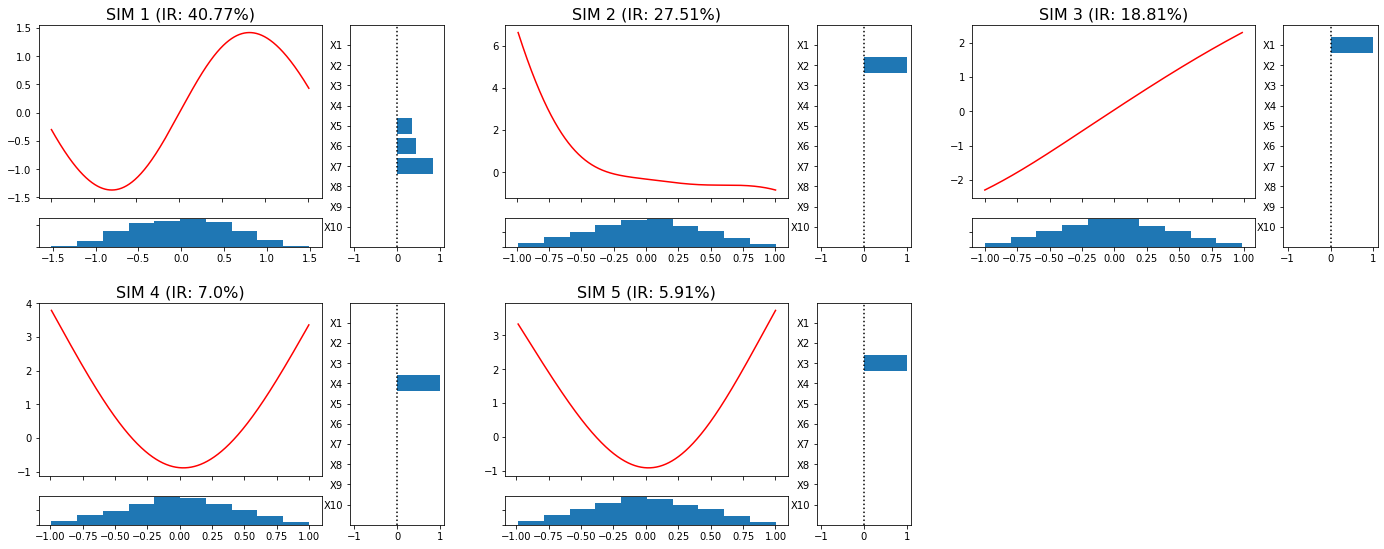

In [2]:
model.visualize_new(cols_per_row=3, folder="./", name="exnn_demo")